# Explore here

Imports 

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

Perform a basic EDA. In this exercise the target variable will be "diabetes_number", indicates the population of diabetes of a given county in the EEUU.

First load the data and transfer to raw folder

In [103]:
all_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
all_data.to_csv("../data/raw/all_data.csv")

all_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


Get the info of the dataset to know what type of variables will be working as the data_dict csv provided only gives and explanation and not their dtype

In [104]:
all_data.info(verbose= True, show_counts= True) #Need to use verbose parameter to show every column and identify them better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Non-Null Count  Dtype  
---   ------                                                                         --------------  -----  
 0    fips                                                                           3140 non-null   int64  
 1    TOT_POP                                                                        3140 non-null   int64  
 2    0-9                                                                            3140 non-null   int64  
 3    0-9 y/o % of total pop                                                         3140 non-null   float64
 4    19-Oct                                                                         3140 non-null   int64  
 5    10-19 y/o % of total pop                                                       3140 non-null   float64
 6    20-29         

Now check for any duplicate entries.

In [105]:
all_data.duplicated().sum()

np.int64(0)

We working only with numerical values.

In [106]:
data_types = all_data.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index)]

num_df = all_data[numeric_columns]

num_df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


With no duplicates and, null values and only numeric values we divide into train and test and standarize the data using StandardScaler

In [107]:
X = num_df.drop(["diabetes_number"], axis= 1) #Independant variables
y = num_df["diabetes_number"]#Dependant variable, our target

#Using train_test_split from Sklearn, divide the variables into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)#Random state set to 42 to replicate the shuffle everytime

#Scale all the variables using StandarScaler
#Create the scaler first
scaler = StandardScaler()

#Use the StandardScaler and create a new dataframe
scal_features = scaler.fit(X_train)

#Scale X_train and X_test
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index= X_train.index, columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index= X_test.index, columns= X_test.columns)


After dividing into train and test, we perform a feature selection. This time, as well as in the previous exercise we don't know the ammount of features to select (k) as SelectKBest with f_regression is going to be used.

Because of this I will use the last method used in the last exercise (which given the big ammount of features to be selected might not be the best)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=106 is greater than n_features=105. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=107 is greater than n_features=105. All the features will be returned.
  warnings.warn(


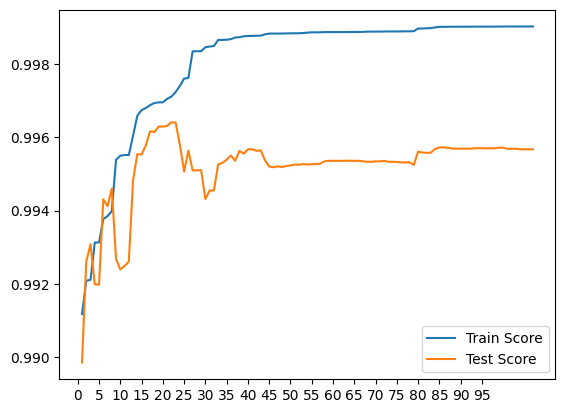

In [108]:
#List of possible values of K and performance
k_val = range(1, len(all_data.columns))
train_scores = []
test_scores = []

for k in k_val:
    #Using selectkbest with every k value and f_regression since it's a linear regression
    selection_model = SelectKBest(f_regression, k= k)
    X_train_sel = selection_model.fit_transform(X_train, y_train)

    #Train the linear regression model
    model = LinearRegression() #Create the model
    model.fit(X_train_sel, y_train)

    #Save the train score and test score on each iteration
    train_scores.append(model.score(X_train_sel, y_train))

    X_test_sel = selection_model.transform(X_test)
    test_scores.append(model.score(X_test_sel, y_test))

#Now we visualize the results to choose the best K
plt.plot(k_val, train_scores, label='Train Score')
plt.plot(k_val, test_scores, label='Test Score')
plt.xticks(np.arange(0, 100, step=5))
plt.legend()
plt.show()

In conclussion, the performance of the model is relatively high between k= 15 and k = 25 then test performance starts to decrease. So we continue with k= 20 as it's a good point between 15 and 25

In [109]:
#We create the selection model, in this case k is the number of features to be selected and f_regression the method used to determine wich are the best features to include
selection_model = SelectKBest(f_regression, k = 20)

#Fit the model with both X_train and y_train
selection_model.fit(X_train_scaled, y_train)

#Gets an array of the features selected
ix = selection_model.get_support()

#With ix we convert that array information into two new datasets that contain the features selected
X_train_features = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train_scaled.columns.values[ix])
X_test_features = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test_scaled.columns.values[ix])


Save the processed data

In [110]:
#Add the target variable to the dataframes that contain the features selected previously
X_train_features["diabetes_number"] = list(y_train)
X_test_features["diabetes_number"] = list(y_test)

#Save the data
X_train_features.to_csv("../data/processed/clean_train.csv", index = False)
X_test_features.to_csv("../data/processed/clean_test.csv", index = False)

After saving the data, loading it again to procceed with the linear regression model fitting (before doing lasso)

In [111]:
#Read the data saved
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

#Divide into train and test for each independant and dependant variables
X_train = train_data.drop(["diabetes_number"], axis= 1) #Independant 
y_train = train_data["diabetes_number"] #Dependant

X_test = test_data.drop(["diabetes_number"], axis= 1) #Independant 
y_test = test_data["diabetes_number"] #Dependant


In [112]:
#Create the linear regression model
model = LinearRegression()

#Train the linear regression model
model.fit(X_train, y_train)

LinearRegression()

Now following the steps, we print the parameters fitted by the model.
- Intercept variable it's the value of the dependant variable (diabetes_number) when all the independant variables are zero.
- Coefficients are the ones that the model uses to get the value of Y, the target.

In [113]:
print(model.intercept_)
print(model.coef_)

9762.924363057322
[-177027.79559194   59865.69467964   10765.06501605    3250.87076276
   -6223.72943325   25685.48464419   10179.80284077   -3954.74000437
 -177027.79559194    1858.53576654   -2378.85767982   -2557.39016803
    1789.57958297   31578.27027577  218191.16222125   34977.80017594
  -13491.79189002   11454.53102003  -11953.99386869   17568.81672636]


Predict using the model and review the results of MSE and R2 score and also getting the metrics without using lasso.

In [114]:
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

#This function get's the main metrics from test and train variables
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Differs'])

yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

get_metrics(yhat_test, y_test, yhat_train, y_train)

1073501.8624574435
0.9962982415925269


,R2,Median AE,MAPE
Train set,0.996961,161.556475,11.811516
Test set,0.996298,150.991647,11.855047
Differs,-0.000662,-10.564828,0.043531


Testing Lasso anyway to see how the result vary according to alpha value

In [115]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.1)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
scoret = lasso_model.score(X_train, y_train)

yhat_train_lasso = lasso_model.predict(X_train)
yhat_lasso = lasso_model.predict(X_test)

get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.422e+09, tolerance: 2.595e+08
  model = cd_fast.enet_coordinate_descent(


,R2,Median AE,MAPE
Train set,0.996556,174.047459,13.813683
Test set,0.995469,170.704717,13.566509
Differs,-0.001087,-3.342741,-0.247173
